In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Multilayer Neural Networks

###  Introduction

In the previous chapter, we explored various methods for training classifiers comprising input units connected via modifiable weights to output units. The **LMS algorithm** provided a powerful gradient descent method to reduce error, even when patterns were not linearly separable. 

However, linear discriminants are often insufficient for problems requiring minimum error. With a clever choice of nonlinear $ \phi $ functions, we can achieve arbitrary decision boundaries, particularly those leading to minimum error. The central difficulty lies in selecting the appropriate nonlinear functions. 

### Motivation for Multilayer Neural Networks

- **Linear discriminants are limited**: They provide hyperplane boundaries, which may be insufficient for complex problems.
- **Learned nonlinearity**: Instead of pre-selecting nonlinear functions, we learn the nonlinearity during training.
- **Multilayer Perceptrons (MLPs)**: These networks overcome the drawbacks of linear methods by implementing nonlinear mappings to new spaces.

---

##  Feedforward Operation and Classification

### Three-Layer Neural Network Example

A simple three-layer neural network consists of:
- **Input layer**: Represents feature vector components.
- **Hidden layer**: Contains neurons that perform nonlinear transformations.
- **Output layer**: Provides discriminant functions for classification.

Each unit in the network is connected via **modifiable weights**. Additionally, a **bias unit** is connected to each neuron except the input units.

### Mathematical Representation

#### Activation Function:
Each neuron computes its output using an activation function, such as:
$$
\phi(x) = \frac{1}{1 + e^{-x}} \quad \text{(Sigmoid Function)}
$$

#### Output at Hidden Layer:
For a hidden layer neuron $ h_j $, the input is:
$$
z_j = \sum_{i} w_{ij} x_i + b_j
$$
and the output is:
$$
h_j = \phi(z_j)
$$

#### Output at Final Layer:
For an output neuron $ o_k $, the input is:
$$
z_k = \sum_{j} w_{kj} h_j + b_k
$$
and the output is:
$$
o_k = \phi(z_k)
$$

### Backpropagation Algorithm

The backpropagation algorithm adjusts weights to minimize the error function:
$$
E = \frac{1}{2} \sum_{k} (t_k - o_k)^2
$$
where $ t_k $ is the target output and $ o_k $ is the actual output.

---

## Network Complexity and Generalization

- **Overfitting**: Too many free parameters can lead to poor generalization.
- **Underfitting**: Insufficient parameters fail to learn the data adequately.

### Regularization Techniques
To balance complexity and generalization:
1. **Weight Decay**: Penalize large weights using a term:
   $$
   \lambda \sum w_{ij}^2
   $$
2. **Dropout**: Randomly deactivate neurons during training to prevent overfitting.

---

## Practical Considerations

### Network Architecture
The optimal network topology depends on the problem domain:
- **Number of hidden layers and units**: Determines the network's capacity.
- **Connections and feedback**: Can incorporate domain-specific knowledge.

### Advantages of Neural Networks
1. **Flexible**: Applicable to a wide array of real-world problems.
2. **Efficient Design**: Easy to test and modify different architectures.
3. **Statistical Pattern Recognition**: Enables complex model building.

---



In [1]:
## Example Network

#Below is an example of a three-layer neural network for binary classification:

#```python
# Example feedforward computation for a simple 3-layer neural network

import math

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Feedforward operation
def feedforward(inputs, weights_hidden, bias_hidden, weights_output, bias_output):
    # Hidden layer computation
    hidden_inputs = [sum(i * w for i, w in zip(inputs, weights)) + b 
                     for weights, b in zip(weights_hidden, bias_hidden)]
    hidden_outputs = [sigmoid(z) for z in hidden_inputs]
    
    # Output layer computation
    output_inputs = sum(h * w for h, w in zip(hidden_outputs, weights_output)) + bias_output
    output = sigmoid(output_inputs)
    
    return output

# Define the network parameters
inputs = [0.5, 0.8]  # Example input
weights_hidden = [[0.2, -0.4], [0.7, 0.1]]  # Weights for 2 hidden neurons
bias_hidden = [0.1, -0.2]  # Biases for hidden neurons
weights_output = [0.6, -0.3]  # Weights for output neuron
bias_output = 0.5  # Bias for output neuron

# Compute the network output
output = feedforward(inputs, weights_hidden, bias_hidden, weights_output, bias_output)
print("Network output:", output)


Network output: 0.6490457222935879


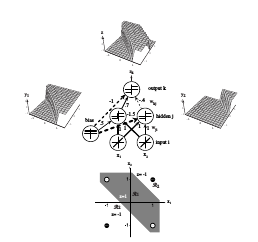

Fig.1: The two-bit parity or exclusive-OR problem can be solved by a three-layer network. At the bottom is the two-dimensional feature space x1 − x2 , and the four patterns to be classiﬁed. The three-layer network is shown in the middle. The input units are linear and merely distribute their (feature) values through multiplicative weights to the hidden units. The hidden and output units here are linear threshold units, each of which forms the linear sum of its inputs times their associated weight, and emits a +1 if this sum is greater than or equal to 0, and −1 otherwise, as shown by the graphs. Positive (“excitatory”) weights are denoted by solid lines, negative (“inhibitory”) weights by dashed lines; the weight magnitude is indicated by the relative thickness, and is labeled. The single output unit sums the weighted signals from the hidden units (and bias) and emits a +1 if that sum is greater than or equal to 0 and a -1 otherwise. Within each unit we show a graph of its input-output or transfer function — f (net) vs. net. This function is linear for the input units, a constant for the bias, and a step or sign function elsewhere. We say that this network has a 2-2-1 fully connected topology, describing the number of units (other than the bias) in successive layers.

# Multilayer Neural Networks

## 6.1 Introduction

In the previous chapter, we explored various methods for training classifiers comprising input units connected via modifiable weights to output units. The **LMS algorithm** provided a powerful gradient descent method to reduce error, even when patterns were not linearly separable. 

However, linear discriminants are often insufficient for problems requiring minimum error. With a clever choice of nonlinear \( \phi \) functions, we can achieve arbitrary decision boundaries, particularly those leading to minimum error. The central difficulty lies in selecting the appropriate nonlinear functions. 

### Motivation for Multilayer Neural Networks

- **Linear discriminants are limited**: They provide hyperplane boundaries, which may be insufficient for complex problems.
- **Learned nonlinearity**: Instead of pre-selecting nonlinear functions, we learn the nonlinearity during training.
- **Multilayer Perceptrons (MLPs)**: These networks overcome the drawbacks of linear methods by implementing nonlinear mappings to new spaces.

---

##  Feedforward Operation and Classification

### Three-Layer Neural Network Example

A simple three-layer neural network consists of:
- **Input layer**: Represents feature vector components.
- **Hidden layer**: Contains neurons that perform nonlinear transformations.
- **Output layer**: Provides discriminant functions for classification.

Each unit in the network is connected via **modifiable weights**. Additionally, a **bias unit** is connected to each neuron except the input units.

### Mathematical Representation

#### Activation Function:
Each neuron computes its output using an activation function, such as:
$$
\phi(x) = \frac{1}{1 + e^{-x}} \quad \text{(Sigmoid Function)}
$$

#### Output at Hidden Layer:
For a hidden layer neuron \( h_j \), the input is:
$$
z_j = \sum_{i} w_{ij} x_i + b_j
$$
and the output is:
$$
h_j = \phi(z_j)
$$

#### Output at Final Layer:
For an output neuron \( o_k \), the input is:
$$
z_k = \sum_{j} w_{kj} h_j + b_k
$$
and the output is:
$$
o_k = \phi(z_k)
$$

### Backpropagation Algorithm

The backpropagation algorithm adjusts weights to minimize the error function:
$$
E = \frac{1}{2} \sum_{k} (t_k - o_k)^2
$$
where \( t_k \) is the target output and \( o_k \) is the actual output.

---

## Network Complexity and Generalization

- **Overfitting**: Too many free parameters can lead to poor generalization.
- **Underfitting**: Insufficient parameters fail to learn the data adequately.

### Regularization Techniques
To balance complexity and generalization:
1. **Weight Decay**: Penalize large weights using a term:
   $$
   \lambda \sum w_{ij}^2
   $$
2. **Dropout**: Randomly deactivate neurons during training to prevent overfitting.

---

## Practical Considerations

### Network Architecture
The optimal network topology depends on the problem domain:
- **Number of hidden layers and units**: Determines the network's capacity.
- **Connections and feedback**: Can incorporate domain-specific knowledge.

### Advantages of Neural Networks
1. **Flexible**: Applicable to a wide array of real-world problems.
2. **Efficient Design**: Easy to test and modify different architectures.
3. **Statistical Pattern Recognition**: Enables complex model building.

---

## Example Network

Below is an example of a three-layer neural network for binary classification:



In [2]:
#```python
# Example feedforward computation for a simple 3-layer neural network

import math

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Feedforward operation
def feedforward(inputs, weights_hidden, bias_hidden, weights_output, bias_output):
    # Hidden layer computation
    hidden_inputs = [sum(i * w for i, w in zip(inputs, weights)) + b 
                     for weights, b in zip(weights_hidden, bias_hidden)]
    hidden_outputs = [sigmoid(z) for z in hidden_inputs]
    
    # Output layer computation
    output_inputs = sum(h * w for h, w in zip(hidden_outputs, weights_output)) + bias_output
    output = sigmoid(output_inputs)
    
    return output

# Define the network parameters
inputs = [0.5, 0.8]  # Example input
weights_hidden = [[0.2, -0.4], [0.7, 0.1]]  # Weights for 2 hidden neurons
bias_hidden = [0.1, -0.2]  # Biases for hidden neurons
weights_output = [0.6, -0.3]  # Weights for output neuron
bias_output = 0.5  # Bias for output neuron

# Compute the network output
output = feedforward(inputs, weights_hidden, bias_hidden, weights_output, bias_output)
print("Network output:", output)





Network output: 0.6490457222935879


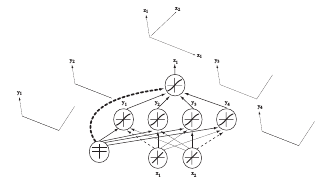

Fig.2: A 2-4-1 network (with bias) along with the response functions at diﬀerent units; each hidden and output unit has sigmoidal transfer function f (·). In the case shown, the hidden unit outputs are paired in opposition thereby producing a “bump” at the output unit. Given a suﬃciently large number of hidden units, any continuous function from input to output can be approximated arbitrarily well by such a network.

## General Feedforward Operation and Expressive Power of Multilayer Networks

##  General Feedforward Operation

From the XOR example, it is evident that **nonlinear multilayer networks** (i.e., networks with input, hidden, and output units) have greater computational power compared to networks without hidden units. Such networks can implement a broader range of functions.

### Discriminant Function

For classification, we typically have $ c $ output units, each corresponding to a category. The signal from each output unit is the discriminant function $ g_k(x) $. 

The general feedforward operation for such networks is described as:
$$
g_k(x) \equiv z_k = f\left( \sum_{j=1}^{n_H} w_{kj} f\left( \sum_{i=1}^{d} w_{ji} x_i + w_{j0} \right) + w_{k0} \right)
$$
where:
- $ x = [x_1, x_2, \dots, x_d] $ is the input vector,
- $ n_H $ is the number of hidden units,
- $ w_{ji} $ are input-to-hidden weights,
- $ w_{kj} $ are hidden-to-output weights,
- $ f $ is the activation function,
- $ w_{j0}, w_{k0} $ are bias weights.

This describes the class of functions a three-layer neural network can implement. Extensions to this generalization could involve:
- Different transfer functions at the output and hidden layers.
- Different transfer functions at each individual unit.

---

##  Expressive Power of Multilayer Networks

### Universal Approximation

A natural question arises: Can every decision boundary be implemented by a three-layer network? The answer, attributed to **Kolmogorov’s theorem**, is **yes**. Any continuous function $ g(x) $ from input to output can be implemented by a three-layer network with:
1. Sufficient number of hidden units $( n_H $),
2. Proper nonlinearities,
3. Suitable weights.

### Kolmogorov's Theorem

For a continuous function $ g(x) $ defined on the unit hypercube $ I^n $ $( I = [0, 1] $), it can be represented as:
$$
g(x) = \sum_{j=1}^{2n+1} \Xi_j \left( \sum_{i=1}^{d} \psi_{ij}(x_i) \right)
$$
where:
- $ \Xi_j $ and $ \psi_{ij} $ are specific nonlinear functions.

While mathematically powerful, Kolmogorov’s theorem has limitations in practical neural networks:
- Functions $ \Xi_j $ and $ \psi_{ij} $ are often highly complex and non-smooth.
- The theorem provides no guidance on how to derive these functions from data.

### Fourier Analogy

Inspired by **Fourier's theorem**, any continuous function $ g(x) $ can be approximated by a sum of harmonic functions. Analogously:
- Neural networks could approximate such functions using hidden units implementing harmonic or localized “bump” functions.
- For example, sigmoidal transfer functions can combine to form these localized responses (see Fig.2).

### Practical Limitations

- While three-layer networks theoretically approximate any function, practical concerns remain:
  - The number of hidden units required is often unknown.
  - Weight initialization and training remain challenging.
  - Constructive proofs of function representation are not directly helpful for real-world pattern recognition tasks.

---

## Decision Boundaries and Multilayer Networks

### Two-Layer vs. Three-Layer Networks

- **Two-Layer Networks**: Limited to linear decision boundaries (see Fig. 6.3).
- **Three-Layer Networks**: With sufficient hidden units, they can implement arbitrary, nonlinear decision boundaries. These boundaries need not be convex or simply connected.

### Visualization of Decision Regions

#### Two-Layer Network
The decision boundaries are linear, creating two regions $ R_1 $ and $ R_2 $.

#### Three-Layer Network
The decision boundaries are nonlinear and can create arbitrarily complex regions $ R_1 $, $ R_2 $, etc.

---

## Figures

### Fig.2: Sigmoidal Transfer Functions and "Bumps"
A 2-4-1 network with bias units is shown, where:
- Each hidden and output unit uses a sigmoidal transfer function.
- Hidden unit outputs can pair in opposition to produce localized “bumps” in the output.

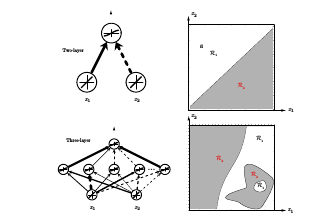

Fig.3: Whereas a two-layer network classiﬁer can only implement a linear decision boundary, given an adequate number of hidden units, three-, four- and higher-layer networks can implement arbitrary decision boundaries. The decision regions need not be convex, nor simply connected.

### Fig.3: Decision Boundaries
Comparing decision regions:
1. Two-layer network: Linear boundaries.
2. Three-layer network: Nonlinear, flexible boundaries.

---

## Summary

- **Three-layer networks** have universal approximation power, capable of representing any continuous function.
- While theoretical constructs like Kolmogorov’s theorem inspire confidence in neural networks, practical training methods are critical for real-world applications.
- The power of multilayer networks lies in their ability to implement complex, nonlinear decision boundaries, making them invaluable in pattern recognition and classification tasks.


In [3]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
outputs = np.array([[0], [1], [1], [0]])

# Set random seed for reproducibility
np.random.seed(42)

# Network architecture: 2-2-1
input_layer_neurons = inputs.shape[1]  # 2 input neurons
hidden_layer_neurons = 2  # 2 hidden neurons
output_neurons = 1  # 1 output neuron

# Random initialization of weights and biases
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(inputs, hidden_weights) + hidden_bias
    hidden_layer_activation = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_activation, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)
    
    # Compute error
    error = outputs - predicted_output
    
    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_activation)
    
    # Update weights and biases
    output_weights += hidden_layer_activation.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights += inputs.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    
    # Print error at specific intervals
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

# Testing
print("\nTrained Weights and Biases:")
print("Hidden Weights:\n", hidden_weights)
print("Hidden Bias:\n", hidden_bias)
print("Output Weights:\n", output_weights)
print("Output Bias:\n", output_bias)

print("\nPredicted Outputs:")
print(predicted_output)


Epoch 0, Error: 0.4977550305860017
Epoch 1000, Error: 0.48962844155619734
Epoch 2000, Error: 0.430505591830237
Epoch 3000, Error: 0.33572637397612615
Epoch 4000, Error: 0.1735749631951773
Epoch 5000, Error: 0.11181272498560187
Epoch 6000, Error: 0.08576413241547488
Epoch 7000, Error: 0.07130866479694545
Epoch 8000, Error: 0.06197519138577699
Epoch 9000, Error: 0.055372184098791355

Trained Weights and Biases:
Hidden Weights:
 [[3.79198478 5.81661184]
 [3.80004873 5.8545897 ]]
Hidden Bias:
 [[-5.82020057 -2.46277158]]
Output Weights:
 [[-8.32186051]
 [ 7.66063503]]
Output Bias:
 [[-3.45550373]]

Predicted Outputs:
[[0.05322146]
 [0.95171535]
 [0.95160449]
 [0.05175396]]


In [4]:
import random
import math

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize training data for XOR
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Input features
y = [[0], [1], [1], [0]]  # Expected output

# Define network architecture
input_layer_size = 2  # Two inputs
hidden_layer_size = 4  # Four hidden units
output_layer_size = 1  # Single output

# Initialize weights and biases randomly
random.seed(42)
weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_layer_size)] for _ in range(input_layer_size)]
weights_hidden_output = [[random.uniform(-1, 1) for _ in range(output_layer_size)] for _ in range(hidden_layer_size)]
bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_layer_size)]
bias_output = [random.uniform(-1, 1) for _ in range(output_layer_size)]

# Training parameters
learning_rate = 0.1
epochs = 10000

# Helper function for dot product
def dot_product(vec1, vec2):
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

# Training process
for epoch in range(epochs):
    total_error = 0
    
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        hidden_layer_input = [dot_product(input_layer, [weights_input_hidden[j][k] for j in range(input_layer_size)]) + bias_hidden[k] for k in range(hidden_layer_size)]
        hidden_layer_output = [sigmoid(val) for val in hidden_layer_input]
        
        output_layer_input = [dot_product(hidden_layer_output, [weights_hidden_output[j][k] for j in range(hidden_layer_size)]) + bias_output[k] for k in range(output_layer_size)]
        output_layer_output = [sigmoid(val) for val in output_layer_input]
        
        # Calculate error
        error = [y[i][j] - output_layer_output[j] for j in range(output_layer_size)]
        total_error += sum(e ** 2 for e in error) / 2
        
        # Backpropagation
        d_output = [error[j] * sigmoid_derivative(output_layer_output[j]) for j in range(output_layer_size)]
        d_hidden = [sigmoid_derivative(hidden_layer_output[k]) * dot_product(d_output, [weights_hidden_output[k][j] for j in range(output_layer_size)]) for k in range(hidden_layer_size)]
        
        # Update weights and biases
        for k in range(hidden_layer_size):
            for j in range(output_layer_size):
                weights_hidden_output[k][j] += learning_rate * d_output[j] * hidden_layer_output[k]
        for k in range(hidden_layer_size):
            for j in range(input_layer_size):
                weights_input_hidden[j][k] += learning_rate * d_hidden[k] * input_layer[j]
        for j in range(output_layer_size):
            bias_output[j] += learning_rate * d_output[j]
        for k in range(hidden_layer_size):
            bias_hidden[k] += learning_rate * d_hidden[k]
    
    # Print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {total_error / len(X)}")

# Testing the trained network
print("\nTesting the network:")
for i in range(len(X)):
    input_layer = X[i]
    hidden_layer_input = [dot_product(input_layer, [weights_input_hidden[j][k] for j in range(input_layer_size)]) + bias_hidden[k] for k in range(hidden_layer_size)]
    hidden_layer_output = [sigmoid(val) for val in hidden_layer_input]
    
    output_layer_input = [dot_product(hidden_layer_output, [weights_hidden_output[j][k] for j in range(hidden_layer_size)]) + bias_output[k] for k in range(output_layer_size)]
    output_layer_output = [sigmoid(val) for val in output_layer_input]
    
    print(f"Input: {X[i]} Output: {[round(output_layer_output[0])]} Expected: {y[i][0]}")


Epoch 0, Error: 0.16277932354530733
Epoch 1000, Error: 0.12549958946585021
Epoch 2000, Error: 0.11834003202362403
Epoch 3000, Error: 0.08797133825237652
Epoch 4000, Error: 0.03270238371549449
Epoch 5000, Error: 0.00954332757943578
Epoch 6000, Error: 0.004542619476735168
Epoch 7000, Error: 0.0027987230277112768
Epoch 8000, Error: 0.001969216574987843
Epoch 9000, Error: 0.0014981379190522213

Testing the network:
Input: [0, 0] Output: [0] Expected: 0
Input: [0, 1] Output: [1] Expected: 1
Input: [1, 0] Output: [1] Expected: 1
Input: [1, 1] Output: [0] Expected: 0


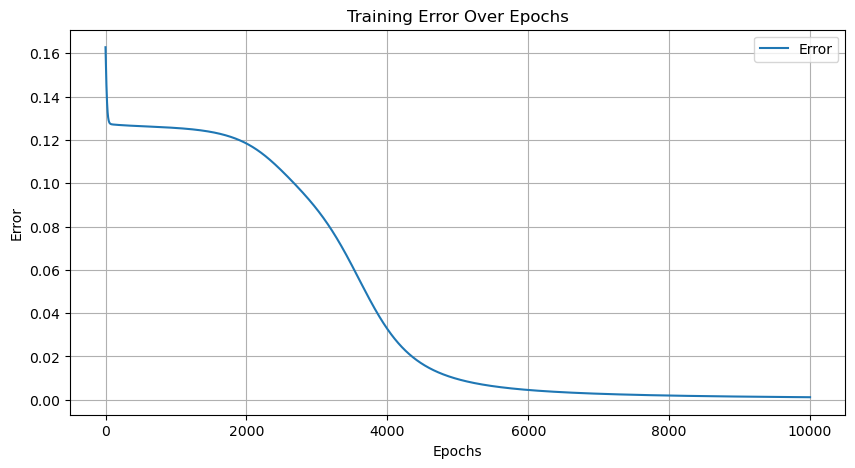


Testing the network:
Input: [0, 0] Output: [0] Expected: 0
Input: [0, 1] Output: [1] Expected: 1
Input: [1, 0] Output: [1] Expected: 1
Input: [1, 1] Output: [0] Expected: 0


In [5]:
import random
import math
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize training data for XOR
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Input features
y = [[0], [1], [1], [0]]  # Expected output

# Define network architecture
input_layer_size = 2  # Two inputs
hidden_layer_size = 4  # Four hidden units
output_layer_size = 1  # Single output

# Initialize weights and biases randomly
random.seed(42)
weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_layer_size)] for _ in range(input_layer_size)]
weights_hidden_output = [[random.uniform(-1, 1) for _ in range(output_layer_size)] for _ in range(hidden_layer_size)]
bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_layer_size)]
bias_output = [random.uniform(-1, 1) for _ in range(output_layer_size)]

# Training parameters
learning_rate = 0.1
epochs = 10000

# Helper function for dot product
def dot_product(vec1, vec2):
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

# Track error over epochs
error_history = []

# Training process
for epoch in range(epochs):
    total_error = 0
    
    for i in range(len(X)):
        # Forward pass
        input_layer = X[i]
        hidden_layer_input = [dot_product(input_layer, [weights_input_hidden[j][k] for j in range(input_layer_size)]) + bias_hidden[k] for k in range(hidden_layer_size)]
        hidden_layer_output = [sigmoid(val) for val in hidden_layer_input]
        
        output_layer_input = [dot_product(hidden_layer_output, [weights_hidden_output[j][k] for j in range(hidden_layer_size)]) + bias_output[k] for k in range(output_layer_size)]
        output_layer_output = [sigmoid(val) for val in output_layer_input]
        
        # Calculate error
        error = [y[i][j] - output_layer_output[j] for j in range(output_layer_size)]
        total_error += sum(e ** 2 for e in error) / 2
        
        # Backpropagation
        d_output = [error[j] * sigmoid_derivative(output_layer_output[j]) for j in range(output_layer_size)]
        d_hidden = [sigmoid_derivative(hidden_layer_output[k]) * dot_product(d_output, [weights_hidden_output[k][j] for j in range(output_layer_size)]) for k in range(hidden_layer_size)]
        
        # Update weights and biases
        for k in range(hidden_layer_size):
            for j in range(output_layer_size):
                weights_hidden_output[k][j] += learning_rate * d_output[j] * hidden_layer_output[k]
        for k in range(hidden_layer_size):
            for j in range(input_layer_size):
                weights_input_hidden[j][k] += learning_rate * d_hidden[k] * input_layer[j]
        for j in range(output_layer_size):
            bias_output[j] += learning_rate * d_output[j]
        for k in range(hidden_layer_size):
            bias_hidden[k] += learning_rate * d_hidden[k]
    
    # Store total error
    error_history.append(total_error / len(X))

# Plot error over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), error_history, label="Error")
plt.title("Training Error Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

# Testing the trained network
print("\nTesting the network:")
for i in range(len(X)):
    input_layer = X[i]
    hidden_layer_input = [dot_product(input_layer, [weights_input_hidden[j][k] for j in range(input_layer_size)]) + bias_hidden[k] for k in range(hidden_layer_size)]
    hidden_layer_output = [sigmoid(val) for val in hidden_layer_input]
    
    output_layer_input = [dot_product(hidden_layer_output, [weights_hidden_output[j][k] for j in range(hidden_layer_size)]) + bias_output[k] for k in range(output_layer_size)]
    output_layer_output = [sigmoid(val) for val in output_layer_input]
    
    print(f"Input: {X[i]} Output: {[round(output_layer_output[0])]} Expected: {y[i][0]}")


## Backpropagation Algorithm

We have established that any continuous function can be implemented by a three-layer neural network. Now, we focus on training such a network by adjusting its weights based on training patterns and desired outputs. The backpropagation algorithm is one of the simplest and most general methods for supervised training of multilayer neural networks. It is an extension of the **LMS algorithm** for linear systems.

---

## **Network Learning**

### **Feedforward Operation**
During feedforward operation, an input pattern $ \mathbf{x} $ is presented to the input layer, and signals propagate through the network to generate an output $ \mathbf{z} $. 

The output $ \mathbf{z} $ is compared to a target $ \mathbf{t} $, and the error is computed. This error is used to adjust weights to make the network's output closer to the target.

---

### **Error Function**
The error for a single training pattern is given by:
$$
J(w) = \frac{1}{2} \sum_{k=1}^c \left( t_k - z_k \right)^2 = \frac{1}{2} \| \mathbf{t} - \mathbf{z} \|^2
$$
where:
- $ c $: number of output units,
- $ \mathbf{t} $: target vector,
- $ \mathbf{z} $: network output vector,
- $ w $: all weights in the network.

---

### **Gradient Descent**
The backpropagation algorithm uses **gradient descent** to minimize the error $ J(w) $ by adjusting weights $ w $:
$$
\Delta w = -\eta \frac{\partial J}{\partial w}
$$
where $ \eta $ is the learning rate, controlling the step size during updates.

For individual weight components:
$$
\Delta w_{mn} = -\eta \frac{\partial J}{\partial w_{mn}}
$$

Weights are iteratively updated as:
$$
w^{(m+1)} = w^{(m)} + \Delta w^{(m)}
$$
where $ m $ indexes the iteration.

---

### **Three-Layer Network Notation**
A three-layer network (input, hidden, output) is fully connected, and each unit's behavior is as follows:

1. **Hidden Layer**: Each hidden unit computes its net input:
   $$
   \text{net}_j = \sum_{i=1}^d w_{ji} x_i
   $$
   where $ w_{ji} $ are the weights connecting input $ x_i $ to hidden unit $ j $.

   The hidden unit output is:
   $$
   y_j = f(\text{net}_j)
   $$
   where $ f(\cdot) $ is a nonlinear activation function (e.g., sigmoid).

2. **Output Layer**: Each output unit computes its net input:
   $$
   \text{net}_k = \sum_{j=1}^{n_H} w_{kj} y_j
   $$
   where $ w_{kj} $ are the weights connecting hidden unit $ j $ to output unit $ k $.

   The final output is:
   $$
   z_k = f(\text{net}_k)
   $$

---

### **Credit Assignment**
Backpropagation solves the **credit assignment problem** by computing an **effective error** for each hidden unit. This allows adjustment of input-to-hidden weights despite the absence of explicit teaching signals at the hidden layer.

---

### Summary of Learning Steps:
1. **Compute Output Error**: For each output unit $ k $:
   $$
   \delta_k = (t_k - z_k) f'(\text{net}_k)
   $$

2. **Backpropagate to Hidden Layer**: For each hidden unit $ j $:
   $$
   \delta_j = f'(\text{net}_j) \sum_{k=1}^c \delta_k w_{kj}
   $$

3. **Update Weights**:
   - Hidden-to-Output Weights:
     $$
     w_{kj} \leftarrow w_{kj} + \eta \delta_k y_j
     $$
   - Input-to-Hidden Weights:
     $$
     w_{ji} \leftarrow w_{ji} + \eta \delta_j x_i
     $$

4. **Update Biases**:
   - For output units:
     $$
     b_k \leftarrow b_k + \eta \delta_k
     $$
   - For hidden units:
     $$
     b_j \leftarrow b_j + \eta \delta_j
     $$

---

### Illustration of Network

Below is the architecture of a three-layer network used in this context:


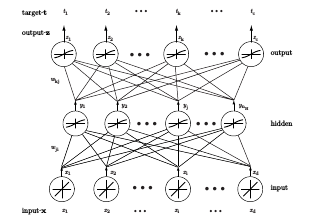

Fig.4: A d-nH -c fully connected three-layer network and the notation we shall use (bias not shown). During feedforward operation, a d-dimensional input pattern x is presented to the input layer; each input unit then emits its corresponding component xi . Each of the nH hidden units computes its net activation, netj , as the inner product of the input layer signals with weights wji at the hidden unit. The hidden unit emits yj = f (netj ), where f (·) is the nonlinear transfer function, shown here as a sigmoid. Each of the c output units functions in the same manner as the hidden units do, computing netk as the inner product of the hidden unit signals and weights at the output unit. The ﬁnal signals emitted by the network, zk = f (netk ) are used as discriminant functions for classiﬁcation. During network training, these output signals are compared with a teaching or target vector t, and any diﬀerence is used in training the weights throughout the network.

- **Input Layer**: $ \mathbf{x} = [x_1, x_2, \dots, x_d] $
- **Hidden Layer**: $ \mathbf{y} = [y_1, y_2, \dots, y_{n_H}] $
- **Output Layer**: $ \mathbf{z} = [z_1, z_2, \dots, z_c] $


In [6]:
import math
import random

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights with random values
def initialize_weights(rows, cols):
    return [[random.uniform(-1, 1) for _ in range(cols)] for _ in range(rows)]

# Forward pass
def forward_pass(input_vector, weights, biases):
    outputs = []
    for j in range(len(weights)):
        net_input = sum(w * i for w, i in zip(weights[j], input_vector)) + biases[j]
        outputs.append(sigmoid(net_input))
    return outputs

# Backward pass (weight updates)
def backward_pass(
    inputs, hidden_outputs, final_outputs, target_outputs, 
    weights_hidden_output, weights_input_hidden, biases_hidden, biases_output, learning_rate
):
    # Calculate output layer errors and deltas
    output_deltas = [(t - z) * sigmoid_derivative(z) for t, z in zip(target_outputs, final_outputs)]

    # Update hidden-to-output weights and output biases
    for k in range(len(weights_hidden_output)):
        for j in range(len(weights_hidden_output[0])):
            weights_hidden_output[k][j] += learning_rate * output_deltas[k] * hidden_outputs[j]
        biases_output[k] += learning_rate * output_deltas[k]

    # Calculate hidden layer errors and deltas
    hidden_deltas = [
        sigmoid_derivative(h) * sum(output_deltas[k] * weights_hidden_output[k][j] for k in range(len(output_deltas)))
        for j, h in enumerate(hidden_outputs)
    ]

    # Update input-to-hidden weights and hidden biases
    for j in range(len(weights_input_hidden)):
        for i in range(len(weights_input_hidden[0])):
            weights_input_hidden[j][i] += learning_rate * hidden_deltas[j] * inputs[i]
        biases_hidden[j] += learning_rate * hidden_deltas[j]

# Train the network
def train_neural_network(
    inputs, targets, n_hidden, learning_rate=0.1, epochs=10000
):
    n_input = len(inputs[0])
    n_output = len(targets[0])

    # Initialize weights and biases
    weights_input_hidden = initialize_weights(n_hidden, n_input)
    weights_hidden_output = initialize_weights(n_output, n_hidden)
    biases_hidden = [random.uniform(-1, 1) for _ in range(n_hidden)]
    biases_output = [random.uniform(-1, 1) for _ in range(n_output)]

    for epoch in range(epochs):
        total_error = 0
        for x, t in zip(inputs, targets):
            # Forward pass
            hidden_outputs = forward_pass(x, weights_input_hidden, biases_hidden)
            final_outputs = forward_pass(hidden_outputs, weights_hidden_output, biases_output)

            # Compute error
            total_error += sum((ti - zi) ** 2 for ti, zi in zip(t, final_outputs))

            # Backward pass
            backward_pass(
                x, hidden_outputs, final_outputs, t, 
                weights_hidden_output, weights_input_hidden, biases_hidden, biases_output, learning_rate
            )

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Total Error: {total_error}")

# Example Usage
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
targets = [
    [0],
    [1],
    [1],
    [0]
]

train_neural_network(inputs, targets, n_hidden=4, learning_rate=0.5, epochs=10000)


Epoch 0, Total Error: 1.0861463732840633
Epoch 1000, Total Error: 0.020139370234673267
Epoch 2000, Total Error: 0.006649837455030656
Epoch 3000, Total Error: 0.003856589970419524
Epoch 4000, Total Error: 0.0026877857978453118
Epoch 5000, Total Error: 0.002052591533142811
Epoch 6000, Total Error: 0.0016556490452755068
Epoch 7000, Total Error: 0.0013849379425748696
Epoch 8000, Total Error: 0.001188906180814062
Epoch 9000, Total Error: 0.0010406075893729895


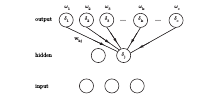

Fig.5: The sensitivity at a hidden unit is proportional to the weighted sum of the c sensitivities at the output units: δj = f  (netj ) wkj δk . The output unit sensitivities k=1 are thus propagated “back” to the hidden units.

## Backpropagation Algorithm

The Backpropagation algorithm is used for training a three-layer neural network. It involves updating weights using gradient descent and the chain rule for derivatives. Below are the equations and explanations for weight updates for the hidden-to-output and input-to-hidden weights.

---

## Weight Update for Hidden-to-Output Weights

The weight update for hidden-to-output weights $ w_{kj} $ is given by:

$$
\Delta w_{kj} = \eta \delta_k y_j
$$

Where:
- $ \eta $: Learning rate
- $ \delta_k = (t_k - z_k) f'(net_k) $: Sensitivity at output unit $ k $
- $ y_j $: Output from hidden unit $ j $

### Sensitivity at Output Unit

The sensitivity $ \delta_k $ is derived as:

$$
\delta_k = (t_k - z_k) f'(net_k)
$$

Here:
- $ t_k $: Target output
- $ z_k $: Actual output
- $ f'(net_k) $: Derivative of the activation function

### Derivative of $ net_k $ with Respect to $ w_{kj} $

Using the chain rule:

$$
\frac{\partial net_k}{\partial w_{kj}} = y_j
$$

Combining the results:

$$
\Delta w_{kj} = \eta (t_k - z_k) f'(net_k) y_j
$$

---

## Weight Update for Input-to-Hidden Weights

The weight update for input-to-hidden weights $ w_{ji} $ is more subtle and is given by:

$$
\Delta w_{ji} = \eta x_i \delta_j
$$

Where:
- $ x_i $: Input from input unit $ i $
- $ \delta_j = f'(net_j) \sum_{k=1}^{c} w_{kj} \delta_k $: Sensitivity at hidden unit $ j $

### Sensitivity at Hidden Unit

The sensitivity \( \delta_j \) is derived as:

$$
\delta_j = f'(net_j) \sum_{k=1}^{c} w_{kj} \delta_k
$$

Where:
- \( f'(net_j) \): Derivative of the activation function at the hidden layer
- \( \sum_{k=1}^{c} w_{kj} \delta_k \): Weighted sum of output sensitivities

---

## Algorithm: Stochastic Backpropagation

The stochastic backpropagation algorithm can be summarized as:

1. **Initialization**:
   - Initialize the network topology, weights \( w_{ij} \), learning rate \( \eta \), and stopping criterion \( \theta \).
2. **Iterate Until Convergence**:
   - Randomly select a pattern \( x_m \) from the training set.
   - Update weights using the equations:
     $$ 
     w_{ij} \gets w_{ij} + \eta \delta_j x_i 
     $$
     $$ 
     w_{jk} \gets w_{jk} + \eta \delta_k y_j 
     $$
   - Stop when \( \nabla J(w) < \theta \).

---

## Training Protocols

1. **Stochastic Training**:
   - Patterns are selected randomly, and weights are updated after each pattern.
2. **Batch Training**:
   - All patterns are presented before updating weights.
3. **Online Training**:
   - Each pattern is presented once and weights are updated immediately.

---

## Implementation

Below is an example Python implementation for a three-layer network:



In [7]:
#```python
# Import required libraries
import math
import random

# Define activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights randomly
def initialize_weights(rows, cols):
    return [[random.uniform(-1, 1) for _ in range(cols)] for _ in range(rows)]

# Forward pass
def forward_pass(inputs, weights, biases):
    outputs = []
    for j in range(len(weights)):
        net = sum(weights[j][i] * inputs[i] for i in range(len(inputs))) + biases[j]
        outputs.append(sigmoid(net))
    return outputs

# Backpropagation
def backpropagation(inputs, targets, weights_ih, weights_ho, bias_h, bias_o, learning_rate):
    hidden_outputs = forward_pass(inputs, weights_ih, bias_h)
    final_outputs = forward_pass(hidden_outputs, weights_ho, bias_o)

    # Output layer deltas
    output_deltas = [(t - o) * sigmoid_derivative(o) for t, o in zip(targets, final_outputs)]

    # Update hidden-to-output weights
    for k in range(len(weights_ho)):
        for j in range(len(weights_ho[0])):
            weights_ho[k][j] += learning_rate * output_deltas[k] * hidden_outputs[j]
        bias_o[k] += learning_rate * output_deltas[k]

    # Hidden layer deltas
    hidden_deltas = [
        sigmoid_derivative(hidden_outputs[j]) * sum(weights_ho[k][j] * output_deltas[k] for k in range(len(output_deltas)))
        for j in range(len(hidden_outputs))
    ]

    # Update input-to-hidden weights
    for j in range(len(weights_ih)):
        for i in range(len(weights_ih[0])):
            weights_ih[j][i] += learning_rate * hidden_deltas[j] * inputs[i]
        bias_h[j] += learning_rate * hidden_deltas[j]

    return final_outputs

# Example usage
inputs = [0.5, 0.1]  # Example input
targets = [0.7]      # Target output
weights_ih = initialize_weights(3, 2)  # Input to hidden weights
weights_ho = initialize_weights(1, 3)  # Hidden to output weights
bias_h = [random.uniform(-1, 1) for _ in range(3)]  # Hidden biases
bias_o = [random.uniform(-1, 1) for _ in range(1)]  # Output biases

# Train the network
for epoch in range(10000):
    output = backpropagation(inputs, targets, weights_ih, weights_ho, bias_h, bias_o, learning_rate=0.5)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Output: {output}")


Epoch 0, Output: [0.2239096649438056]
Epoch 1000, Output: [0.6999999999999996]
Epoch 2000, Output: [0.7]
Epoch 3000, Output: [0.7]
Epoch 4000, Output: [0.7]
Epoch 5000, Output: [0.7]
Epoch 6000, Output: [0.7]
Epoch 7000, Output: [0.7]
Epoch 8000, Output: [0.7]
Epoch 9000, Output: [0.7]


##  Learning Curves

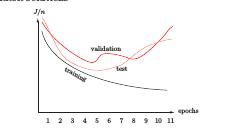

Fig.6: A learning curve shows the criterion function as a function of the amount of training, typically indicated by the number of epochs or presentations of the full n training set. We plot the average error per pattern, i.e., 1/n p=1 Jp . The validation error and the test (or generalization) error per pattern are virtually always higher than the training error. In some protocols, training is stopped at the minimum of the validation set.

Because the weights are initialized with random values, the error on the training set is large. Through learning, the error decreases, as shown in a learning curve (Fig.6). The (per pattern) training error ultimately reaches an asymptotic value, which depends on the Bayes error, the amount of training data, and the expressive power (e.g., the number of weights) in the network. The higher the Bayes error and the fewer the number of such weights, the higher this asymptotic value is likely to be.

Since batch backpropagation performs gradient descent in the criterion function, the training error decreases monotonically. The average error on an independent test set is virtually always higher than on the training set, and while it generally decreases, it can increase or oscillate.

Figure 6.6 also shows the average error on a validation set — patterns not used directly for gradient descent training, and thus indirectly representative of novel patterns yet to be classified. The validation set can be used in a stopping criterion in both batch and stochastic protocols. Gradient descent training on the training set is stopped when a minimum is reached in the validation error (e.g., near epoch 5 in the figure). We shall return in Chapter ?? to understand in greater depth why this version of cross-validation stopping criterion often leads to networks having improved cross-recognition accuracy.

##  Error Surfaces

Since backpropagation is based on gradient descent in a criterion function, we can gain understanding and intuition about the algorithm by studying error surfaces themselves — the function $ J(w) $. Of course, such an error surface depends on the training and classification task. Nevertheless, there are some general properties of error surfaces that seem to hold over a broad range of real-world pattern recognition problems. One of the issues that concerns us is local minima; if many local minima plague the error landscape, then it is unlikely that the network will find the global minimum. Does this necessarily lead to poor performance?

Another issue is the presence of plateaus — regions where the error varies only slightly as a function of weights. If such plateaus are plentiful, we can expect training according to Algorithms 1 & 2 to be slow. Since training typically begins with small weights, the error surface in the neighborhood of $ w \approx 0 $ will determine the general direction of descent. 

What can we say about the error in this region? Most interesting real-world problems are of high dimensionality. Are there any general properties of high-dimensional error functions? We now explore these issues in some illustrative systems.

###  Some Small Networks

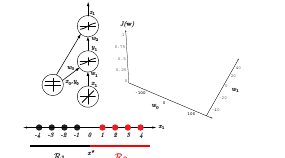

Fig.7: Six one-dimensional patterns (three in each of two classes) are to be learned by a 1-1-1 network with sigmoidal hidden and output units (and bias). The error surface as a function of w1 and w2 is also shown (for the case where the bias weights have their ﬁnal values). The network starts with random weights, and through (stochastic) training descends to the global minimum in error, as shown by the trajec- tory. Note especially that a low error solution exists, which in fact leads to a decision boundary separating the training points into their two categories.
Consider the simplest three-layer nonlinear network, here solving a two-category problem in one dimension. This 1-1-1 sigmoidal network (and bias) is shown in Fig.7. The data shown are linearly separable, and the optimal decision boundary (a point somewhat below $ x_1 = 0 $) separates the two categories. During learning, the weights descend to the global minimum, and the problem is solved.

The error surface as a function of $ w_1 $ and $ w_2 $ is also shown (for the case where the bias weights have their final values). The network starts with random weights, and through (stochastic) training, it descends to the global minimum in error, as shown by the trajectory. Note especially that a low-error solution exists, which in fact leads to a decision boundary separating the training points into their two categories. 

Here, the error surface has a single (global) minimum, which yields the decision point separating the patterns of the two categories. Different plateaus in the surface correspond roughly to different numbers of patterns properly classified. The maximum number of such misclassified patterns is three in this example. The plateau regions, where weight change does not lead to a change in error, correspond to sets of weights that lead to roughly the same decision point in the input space.

Thus, as $ w_1 $ increases and $ w_2 $ becomes more negative, the surface shows that the error does not change. This result can be informally confirmed by looking at the network itself.

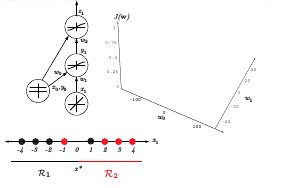

Fig.8: As in Fig.7, except here the patterns are not linearly separable; the error surface is slightly higher than in that ﬁgure.
Now consider the same network applied to another, harder, one-dimensional problem — one that is not linearly separable (Fig.8). First, note that overall, the error surface is slightly higher than in Fig.7 because even the best solution attainable with this network leads to one pattern being misclassified.

As before, the different plateaus in error correspond to different numbers of training patterns properly learned. However, one must not confuse the (squared) error measure with classification error. For instance, here there are two general ways to misclassify exactly two patterns, but these have different errors.

Incidentally, a 1-3-1 network (but not a 1-2-1 network) can solve this problem.

From these very simple examples, where the correspondences among weight values, decision boundary, and error are manifest, we can see how the error of the global minimum is lower when the problem can be solved and that there are plateaus corresponding to sets of weights that lead to nearly the same decision boundary. Furthermore, the surface near $ w \approx 0 $ (the traditional region for starting learning) has high slope. If the starting point had differed somewhat, the network would descend to the same final weight values.


In [8]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Batch backpropagation algorithm
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the network topology
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights with small random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        
        # Initialize biases
        self.bias_hidden = np.random.randn(1, self.hidden_size)
        self.bias_output = np.random.randn(1, self.output_size)
        
        # Learning rate
        self.learning_rate = 0.01

    def feedforward(self, X):
        # Feedforward function to calculate the output
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backpropagate(self, X, y):
        # Compute the error for output layer
        output_error = y - self.final_output
        output_delta = output_error * sigmoid_derivative(self.final_output)
        
        # Compute the error for hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        # Train the network using batch backpropagation
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagate(X, y)
            if epoch % 100 == 0:  # Print the error every 100 epochs
                error = np.mean(np.square(y - self.final_output))  # Mean squared error
                print(f'Epoch {epoch}, Error: {error}')

    def predict(self, X):
        # Predict the output for new input data
        return self.feedforward(X)

# Example usage

# Define the training data (X) and the expected output (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR input
y = np.array([[0], [1], [1], [0]])  # XOR output

# Create the neural network with 2 input units, 2 hidden units, and 1 output unit
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the neural network
nn.train(X, y, epochs=10000)

# Test the network after training
print("Predictions after training:")
print(nn.predict(X))


Epoch 0, Error: 0.3799037577703846
Epoch 100, Error: 0.3495603884733573
Epoch 200, Error: 0.31770194650645334
Epoch 300, Error: 0.29049646000428797
Epoch 400, Error: 0.2716448077598042
Epoch 500, Error: 0.26046823763717813
Epoch 600, Error: 0.25437777347272805
Epoch 700, Error: 0.251129208341054
Epoch 800, Error: 0.24934114950725123
Epoch 900, Error: 0.24827381218246053
Epoch 1000, Error: 0.24755338754206282
Epoch 1100, Error: 0.24699519756888466
Epoch 1200, Error: 0.24650865560825844
Epoch 1300, Error: 0.24604939744779508
Epoch 1400, Error: 0.24559573456186928
Epoch 1500, Error: 0.24513714974242484
Epoch 1600, Error: 0.24466867460292718
Epoch 1700, Error: 0.2441881321501192
Epoch 1800, Error: 0.24369477692146468
Epoch 1900, Error: 0.243188618613829
Epoch 2000, Error: 0.24267008078101854
Epoch 2100, Error: 0.24213982407126738
Epoch 2200, Error: 0.24159865036907124
Epoch 2300, Error: 0.24104744682802376
Epoch 2400, Error: 0.24048714976376828
Epoch 2500, Error: 0.23991871872752746
Epoch 

Epoch 0, Error: 0.2812095976285108
Epoch 1000, Error: 0.2578606214315458
Epoch 2000, Error: 0.252647220579818
Epoch 3000, Error: 0.2502178128610141
Epoch 4000, Error: 0.2487512659045134
Epoch 5000, Error: 0.24741459719142883
Epoch 6000, Error: 0.24574918447082944
Epoch 7000, Error: 0.24340672031801736
Epoch 8000, Error: 0.24009626769529577
Epoch 9000, Error: 0.23563346593268955
Predictions after training:
[[0.43110344]
 [0.52735977]
 [0.51428659]
 [0.52418076]]


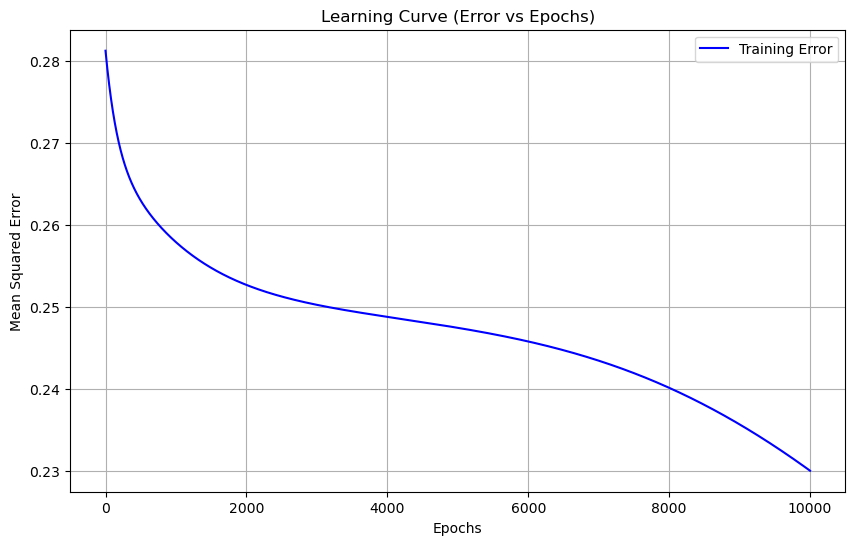

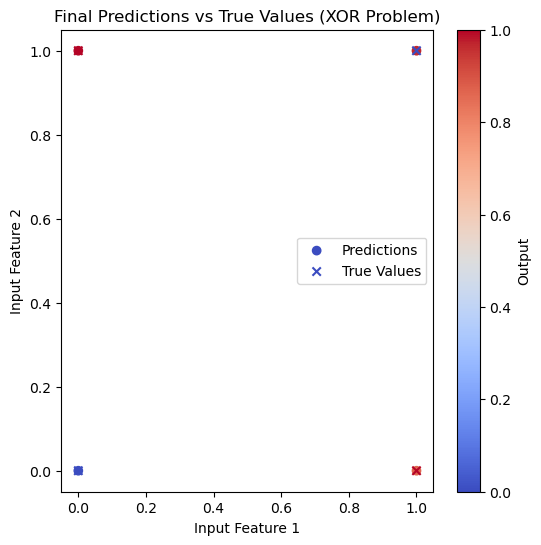

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Batch backpropagation algorithm
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the network topology
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights with small random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        
        # Initialize biases
        self.bias_hidden = np.random.randn(1, self.hidden_size)
        self.bias_output = np.random.randn(1, self.output_size)
        
        # Learning rate
        self.learning_rate = 0.01
        self.errors = []  # To store the error for plotting

    def feedforward(self, X):
        # Feedforward function to calculate the output
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backpropagate(self, X, y):
        # Compute the error for output layer
        output_error = y - self.final_output
        output_delta = output_error * sigmoid_derivative(self.final_output)
        
        # Compute the error for hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        # Update weights and biases
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        # Train the network using batch backpropagation
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagate(X, y)
            
            # Calculate error (mean squared error)
            error = np.mean(np.square(y - self.final_output))
            self.errors.append(error)  # Store the error for plotting
            
            if epoch % 1000 == 0:  # Print the error every 1000 epochs
                print(f'Epoch {epoch}, Error: {error}')

    def predict(self, X):
        # Predict the output for new input data
        return self.feedforward(X)

# Example usage

# Define the training data (X) and the expected output (y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR input
y = np.array([[0], [1], [1], [0]])  # XOR output

# Create the neural network with 2 input units, 2 hidden units, and 1 output unit
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the neural network
nn.train(X, y, epochs=10000)

# Test the network after training
print("Predictions after training:")
print(nn.predict(X))

# Plotting the learning curve (error vs epochs)
plt.figure(figsize=(10, 6))
plt.plot(range(len(nn.errors)), nn.errors, label="Training Error", color='b')
plt.title("Learning Curve (Error vs Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.show()

# Plotting the final predictions vs actual outputs
plt.figure(figsize=(6, 6))
predictions = nn.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=predictions.flatten(), cmap='coolwarm', label='Predictions')
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), marker='x', cmap='coolwarm', label='True Values')
plt.title("Final Predictions vs True Values (XOR Problem)")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.legend()
plt.colorbar(label='Output')
plt.show()


Epoch 0, Error: 0.14996872353839155
Epoch 1000, Error: 0.03644318448784443
Epoch 2000, Error: 0.018066193766110412
Epoch 3000, Error: 0.011564930883110862
Epoch 4000, Error: 0.00836904971770873
Epoch 5000, Error: 0.006501461895563806
Epoch 6000, Error: 0.005288040380875132
Epoch 7000, Error: 0.0044412307641433215
Epoch 8000, Error: 0.003819105913018907
Epoch 9000, Error: 0.003344020856679932
Epoch 0, Error: 0.8781086594512592
Epoch 1000, Error: 0.47853485296472764
Epoch 2000, Error: 0.08919117490234893
Epoch 3000, Error: 0.03594854956282656
Epoch 4000, Error: 0.021089831608827558
Epoch 5000, Error: 0.014568811772227977
Epoch 6000, Error: 0.010996351741112376
Epoch 7000, Error: 0.008769504868817496
Epoch 8000, Error: 0.007259670730701756
Epoch 9000, Error: 0.006173786216652361
Epoch 0, Error: 0.004726261768100652
Epoch 1000, Error: 0.0041381155525319
Epoch 2000, Error: 0.0036750338544041393
Epoch 3000, Error: 0.003301508383611077
Epoch 4000, Error: 0.0029942095277518954
Epoch 5000, Erro

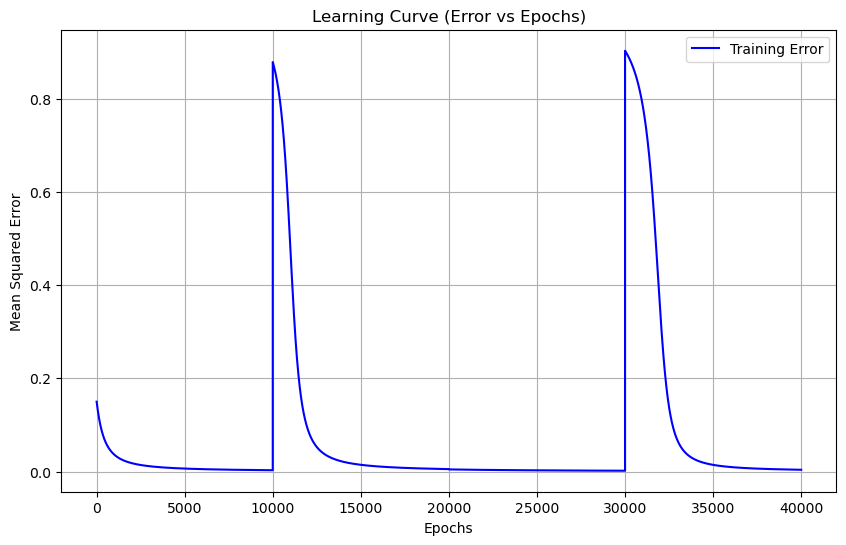

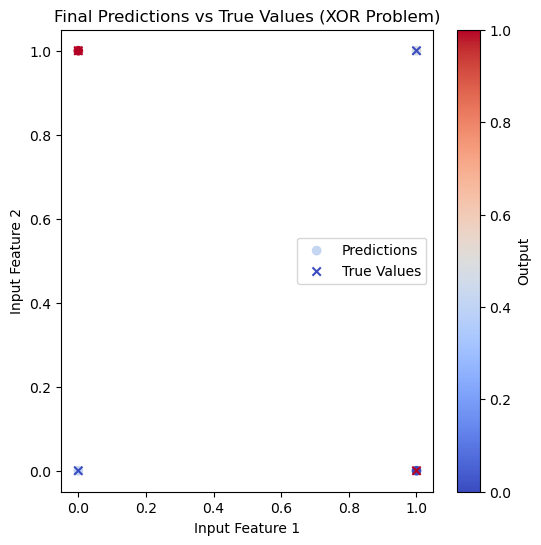

In [10]:
import random
import math
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Batch backpropagation algorithm using pure Python
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the network topology
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases with random values
        self.weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
        self.weights_hidden_output = [[random.uniform(-1, 1) for _ in range(output_size)] for _ in range(hidden_size)]
        
        self.bias_hidden = [random.uniform(-1, 1) for _ in range(hidden_size)]
        self.bias_output = [random.uniform(-1, 1) for _ in range(output_size)]
        
        # Learning rate
        self.learning_rate = 0.01
        self.errors = []  # To store the error for plotting

    def feedforward(self, X):
        # Feedforward function to calculate the output
        self.hidden_input = [sum(X[i] * self.weights_input_hidden[i][j] for i in range(self.input_size)) + self.bias_hidden[j] for j in range(self.hidden_size)]
        self.hidden_output = [sigmoid(val) for val in self.hidden_input]
        
        self.final_input = [sum(self.hidden_output[j] * self.weights_hidden_output[j][k] for j in range(self.hidden_size)) + self.bias_output[k] for k in range(self.output_size)]
        self.final_output = [sigmoid(val) for val in self.final_input]
        
        return self.final_output

    def backpropagate(self, X, y):
        # Compute the error for output layer
        output_error = [y[k] - self.final_output[k] for k in range(self.output_size)]
        output_delta = [output_error[k] * sigmoid_derivative(self.final_output[k]) for k in range(self.output_size)]
        
        # Compute the error for hidden layer
        hidden_error = [sum(output_delta[k] * self.weights_hidden_output[j][k] for k in range(self.output_size)) for j in range(self.hidden_size)]
        hidden_delta = [hidden_error[j] * sigmoid_derivative(self.hidden_output[j]) for j in range(self.hidden_size)]
        
        # Update weights and biases
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                self.weights_input_hidden[i][j] += X[i] * hidden_delta[j] * self.learning_rate
        
        for j in range(self.hidden_size):
            for k in range(self.output_size):
                self.weights_hidden_output[j][k] += self.hidden_output[j] * output_delta[k] * self.learning_rate
        
        for j in range(self.hidden_size):
            self.bias_hidden[j] += hidden_delta[j] * self.learning_rate
        
        for k in range(self.output_size):
            self.bias_output[k] += output_delta[k] * self.learning_rate

    def train(self, X, y, epochs):
        # Train the network using batch backpropagation
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagate(X, y)
            
            # Calculate error (mean squared error)
            error = sum((y[k] - self.final_output[k]) ** 2 for k in range(self.output_size)) / len(y)
            self.errors.append(error)  # Store the error for plotting
            
            if epoch % 1000 == 0:  # Print the error every 1000 epochs
                print(f'Epoch {epoch}, Error: {error}')

    def predict(self, X):
        # Predict the output for new input data
        return self.feedforward(X)

# Example usage

# Define the training data (X) and the expected output (y)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # XOR input
y = [[0], [1], [1], [0]]  # XOR output

# Create the neural network with 2 input units, 2 hidden units, and 1 output unit
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the neural network
for x, target in zip(X, y):
    nn.train(x, target, epochs=10000)

# Test the network after training
print("Predictions after training:")
for x in X:
    print(nn.predict(x))

# Plotting the learning curve (error vs epochs)
plt.figure(figsize=(10, 6))
plt.plot(range(len(nn.errors)), nn.errors, label="Training Error", color='b')
plt.title("Learning Curve (Error vs Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.show()

# Plotting the final predictions vs actual outputs
plt.figure(figsize=(6, 6))
predictions = [nn.predict(x) for x in X]
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[p[0] for p in predictions], cmap='coolwarm', label='Predictions')
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[y[0] for y in y], marker='x', cmap='coolwarm', label='True Values')
plt.title("Final Predictions vs True Values (XOR Problem)")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.legend()
plt.colorbar(label='Output')
plt.show()
